In [34]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as sts

# Study data files
mouse_metadata_path = "Pymaceuticals/data/Mouse_metadata.csv"
study_results_path = "Pymaceuticals/data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

merged = pd.merge(mouse_metadata, study_results, on="Mouse ID", how="left")
merged.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [35]:
#Checking the number of mice

len(merged['Mouse ID'].unique())

249

In [36]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 

merged.loc[merged.duplicated(subset=['Mouse ID','Timepoint']), "Mouse ID"].unique()

array(['g989'], dtype=object)

In [37]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.

dropped = merged[merged['Mouse ID'] == 'g989'].index

merged.drop(dropped, inplace=True)

merged.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [38]:
# Checking the number of mice in the clean DataFrame.

len(merged['Mouse ID'].unique())


248

# Summary Statistics

In [39]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 

grouped = merged.groupby('Drug Regimen')

# mean, median, variance, standard deviation, and SEM of the tumor volume. 

mean = grouped['Tumor Volume (mm3)'].mean()

median = grouped['Tumor Volume (mm3)'].median()

variance = grouped['Tumor Volume (mm3)'].var()

std_dev = grouped['Tumor Volume (mm3)'].std()

sem = grouped['Tumor Volume (mm3)'].sem()

# Assemble the resulting series into a single summary dataframe.

summary = pd.DataFrame({"Mean Tumor Volume": mean, "Median Tumor Volume": median,
                              "Tumor Volume Variance": variance, "Tumor Volume Std. Dev.": std_dev,
                              "Tumor Volume Std. Err": sem})
summary

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [40]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line

stats = grouped.agg(['mean', 'median', 'var', 'std', 'sem'])['Tumor Volume (mm3)']

stats


,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


# Bar and Pie Charts

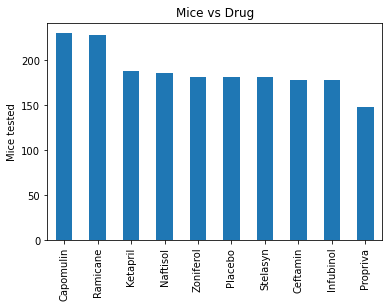

In [41]:
# Generate a bar plot showing the total number of unique mice tested on each drug regimen using pandas.

drug = merged['Drug Regimen'].value_counts()

drug.plot(kind="bar");

plt.ylabel('Mice tested');

plt.title('Mice vs Drug');

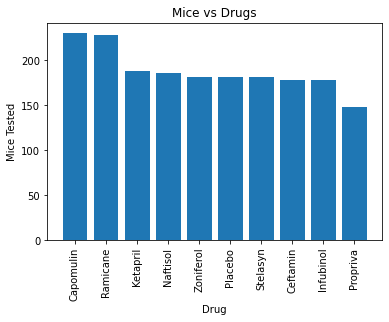

In [42]:
# Generate a bar plot showing the total number of unqiue mice tested on each drug regimen using using pyplot.

drugs = drug.index.to_list()

mice = merged['Drug Regimen'].value_counts()

ticks = [values for values in drugs]

plt.bar(drugs, mice)

plt.xticks(ticks, drugs, rotation=90)

plt.title('Mice vs Drugs')

plt.xlabel('Drug')

plt.ylabel('Mice Tested')

plt.show()

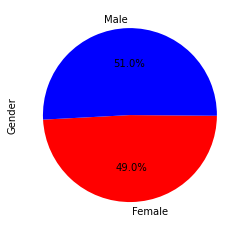

In [43]:
# Generate a pie plot showing the distribution of female versus male mice using pandas

genders = merged.groupby('Sex').count()

labels = genders.index.to_list()

sizes = genders['Mouse ID'].to_list()

colors = ['red', 'blue']

genders.plot(kind='pie', y='Mouse ID', colors=colors, autopct='%1.1f%%', startangle=183, legend=None)

plt.ylabel('Gender')

plt.show()

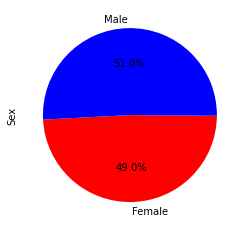

In [44]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=183)

plt.ylabel('Sex')

plt.show()

# Quartiles, Outliers, and Boxplots

In [45]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse

greatest = merged.groupby(["Mouse ID"])['Timepoint'].max()

greatest.reset_index(drop=True)

greatest.head()

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint

volume_df = pd.merge(greatest, merged, on=['Mouse ID', 'Timepoint'], how='left')

volume_df

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a203,45,Infubinol,Female,20,23,67.973419,2
1,a251,45,Infubinol,Female,21,25,65.525743,1
2,a262,45,Placebo,Female,17,29,70.717621,4
3,a275,45,Ceftamin,Female,20,28,62.999356,3
4,a366,30,Stelasyn,Female,16,29,63.440686,1
...,...,...,...,...,...,...,...,...
243,z435,10,Propriva,Female,12,26,48.710661,0
244,z578,45,Ramicane,Male,11,16,30.638696,0
245,z581,45,Infubinol,Female,24,25,62.754451,3
246,z795,45,Naftisol,Female,13,29,65.741070,3


In [46]:
# Put treatments into a list for for loop (and later for plot labels)
treatment_list = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol_list = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for drug in treatment_list:
    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    final_tumor_vol = merged.loc[merged["Drug Regimen"] == drug, 'Tumor Volume (mm3)']
    
    # add subset 
    tumor_vol_list.append(final_tumor_vol)
    
    # Determine outliers using upper and lower bounds
    quartiles = final_tumor_vol.quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    outliers = final_tumor_vol.loc[(final_tumor_vol < lower_bound) | (final_tumor_vol > upper_bound)]
    print(f"{drug}'s potential outliers: {outliers}")

Capomulin's potential outliers: 18    25.472143
19    23.343598
Name: Tumor Volume (mm3), dtype: float64
Ramicane's potential outliers: 9    22.050126
Name: Tumor Volume (mm3), dtype: float64
Infubinol's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Ceftamin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)


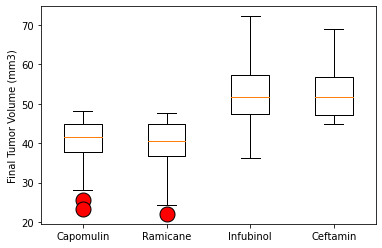

In [47]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest

outlier = dict(markerfacecolor='r', markersize=15, markeredgecolor='black')

plt.boxplot(tumor_vol_list, labels = treatment_list, flierprops=outlier)

plt.ylabel('Final Tumor Volume (mm3)')

plt.show()

# Line and Scatter Plots

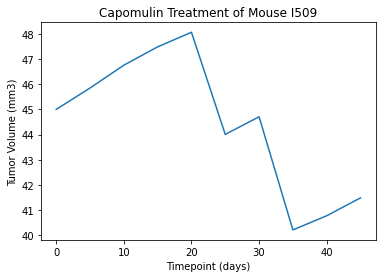

In [48]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin

capomulin_df = merged[merged['Drug Regimen'] == 'Capomulin']

capomulin_df.head()

capomulin = capomulin_df.loc[capomulin_df['Mouse ID'] == 'l509']

capomulin

Timepoint = capomulin['Timepoint'];

Volume = capomulin['Tumor Volume (mm3)'];

plt.plot(Timepoint, Volume)

plt.title('Capomulin Treatment of Mouse I509');

plt.xlabel('Timepoint (days)');

plt.ylabel('Tumor Volume (mm3)');

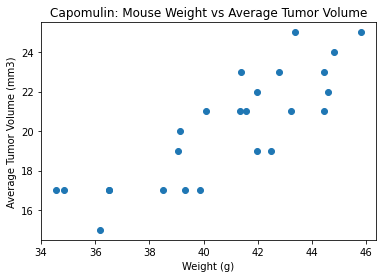

In [49]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen

average = capomulin_df.groupby('Mouse ID').mean()

tumorvolume = average['Tumor Volume (mm3)']

weight = average['Weight (g)']

plt.scatter (tumorvolume, weight);

plt.title('Capomulin: Mouse Weight vs Average Tumor Volume');

plt.xlabel('Weight (g)');

plt.ylabel('Average Tumor Volume (mm3)');

# Correlation and Regression

The correlation between mouse weight and the average tumor volume is 0.84


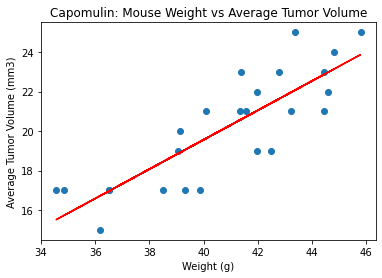

In [52]:
# Calculate the correlation coefficient and linear regression model 

correlation = sts.pearsonr(tumorvolume, weight)

rounded = round(correlation[0], 2)

print(f"The correlation between mouse weight and the average tumor volume is {rounded}")

# for mouse weight and average tumor volume for the Capomulin regimen

(slope, intercept, rvalue, pvalue, stderr) = sts.linregress(tumorvolume, weight)
regress_values = tumorvolume * slope + intercept

plt.scatter (tumorvolume, weight);

plt.plot(tumorvolume, regress_values, "r-")

plt.title('Capomulin: Mouse Weight vs Average Tumor Volume');

plt.xlabel('Weight (g)');

plt.ylabel('Average Tumor Volume (mm3)');